<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/06_Ensemble(GradientBoostingClassifier)/Heart_disease_prediction/heart_disease_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

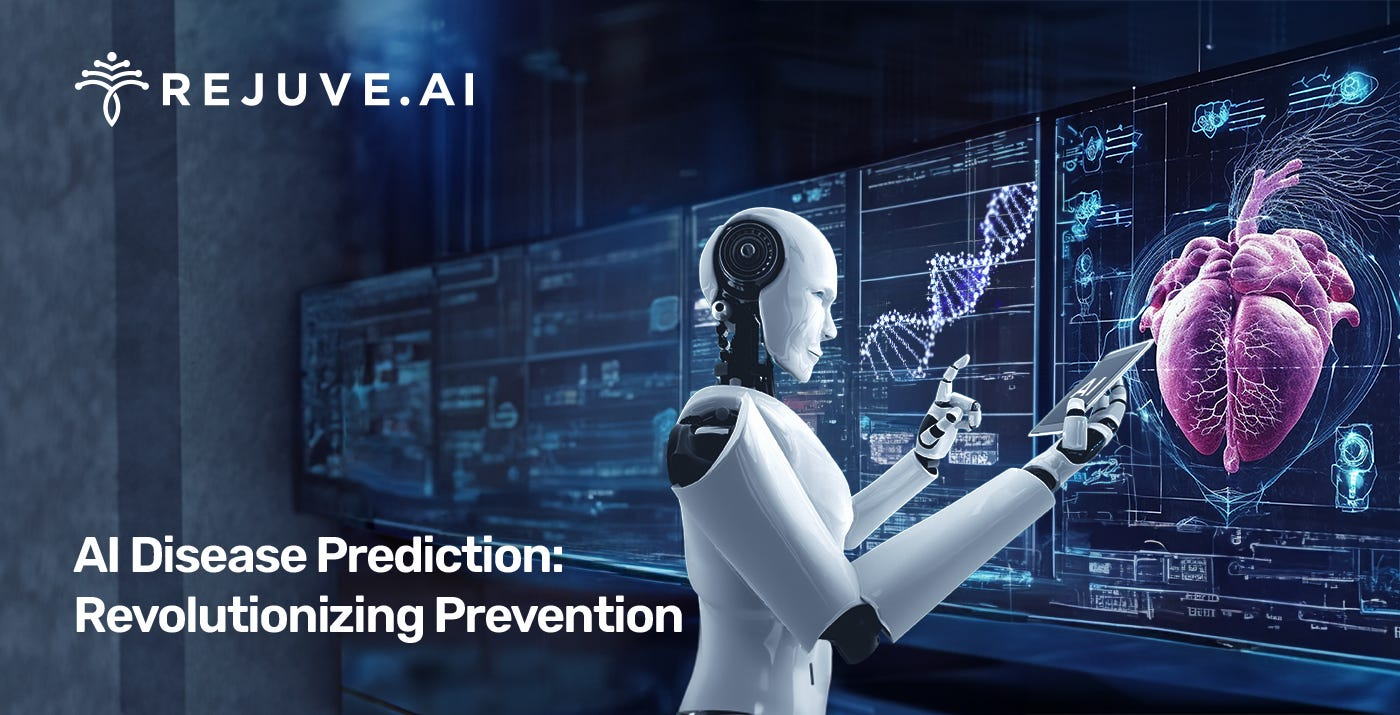
#**🫀 Heart Disease Prediction using Gradient Boosting**

**📘 Project Overview**

This project focuses on predicting the likelihood of heart disease based on patient health indicators such as age, cholesterol level, resting blood pressure, chest pain type, and other medical attributes. The dataset used is the Cardiovascular Disease dataset (from Kaggle), which is a well-known benchmark for binary classification tasks in healthcare analytics.


**Data Loading and exploration**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart_2.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [ ]:
# confirming if my data has missing or null values
print(f"Null Values: {df.isna().sum()}")
print("\n")
print(f"Duplicate Values: {df.duplicated().sum()}")

Null Values: id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64


Duplicate Values: 0


In [ ]:
#remaning columns for clarity
df = df.rename(columns={"ap_hi":"systolic blood pressure", "ap_lo":"diastolic blood pressure", "alco":"alcohol intake", "active":"Physical activity", "cardio":"disease"})
df.head()

,id,age,gender,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alcohol intake,Physical activity,disease,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


**Feature Engineering**

In [ ]:
df = pd.get_dummies(df, drop_first=True, columns=["bp_category"], dtype=int)
df = df.drop(columns=["id","bp_category_encoded","age"])


In [ ]:
#Knowing the features that has strong correlation with target variable
abs(df.corr(numeric_only=True)["disease"]).sort_values(ascending=False)

,disease
disease,1.000000
systolic blood pressure,0.433802
diastolic blood pressure,0.342900
bp_category_Hypertension Stage 2,0.339099
age_years,0.238875
cholesterol,0.220778
bp_category_Normal,0.217798
weight,0.177829
bmi,0.162880
bp_category_Hypertension Stage 1,0.107116


In [ ]:
# Verifying imbalance
df["disease"].value_counts()

,count
disease,
0,34533
1,33672


**Creating input variable and target variable**

In [ ]:
x = df.drop(columns=["disease"])
y = df["disease"]

**Spliting into train/test sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=39)
print(x_train.shape)
print(x_test.shape)

(54564, 15)
(13641, 15)


**Scaling features using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

**Training GradientBoostingClassifier Model from ensemble**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=300,
        learning_rate=0.05,
            max_depth=3,
                random_state=42
                )

gb_model.fit(x_train, y_train)
gb_model.score(x_test, y_test)

0.7418810937614544

**Evaluate performance using classification report and confusion matrix:** The model achieved an accuracy of 0.74 on the test set, showing reasonable performance in identifying patients with potential heart disease.

In [ ]:
#classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = gb_model.predict(x_test)
c_report = classification_report(y_test, y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6884
           1       0.76      0.70      0.73      6757

    accuracy                           0.74     13641
   macro avg       0.74      0.74      0.74     13641
weighted avg       0.74      0.74      0.74     13641



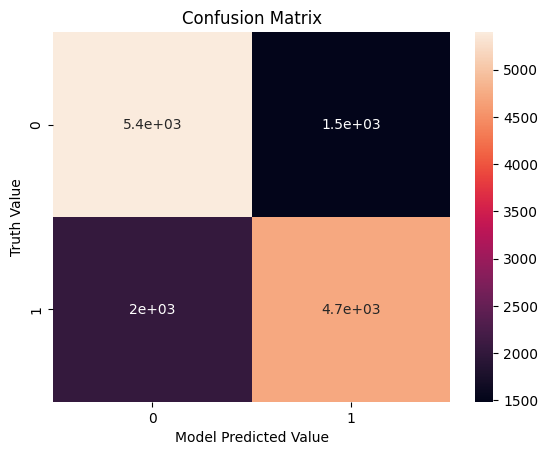

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(C_matrix, annot=True)
plt.xlabel("Model Predicted Value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")
plt.show()

**Visualising features importance:** Feature importance analysis was performed to identify the most influential factors contributing to heart disease prediction. Key features such as systolic blood pressure, age, cholesterol, BMI, diastolic blood pressure, weight, physical activity were found to have high predictive power.

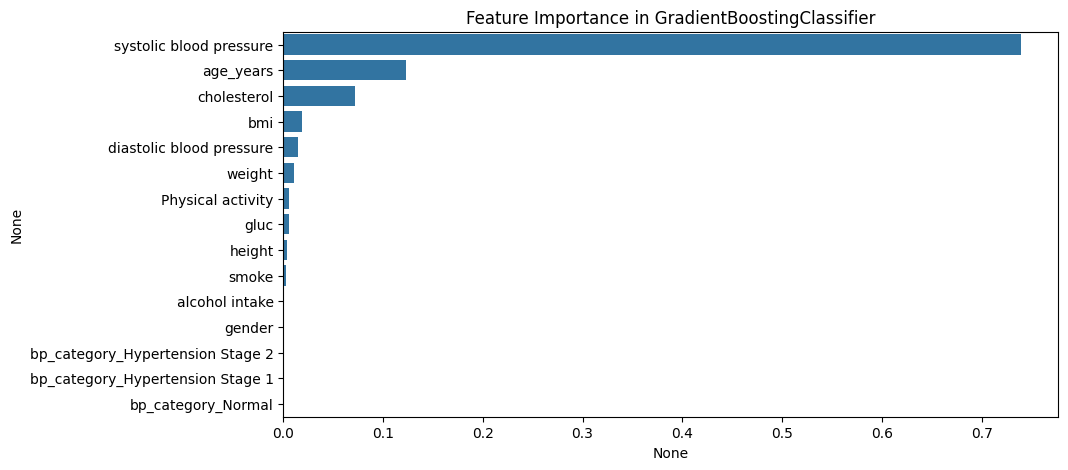

In [ ]:
feat_imp = pd.Series(gb_model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance in GradientBoostingClassifier")
plt.show()


**✅ Conclusion**

The Gradient Boosting model demonstrates how machine learning can assist in early detection of heart disease risk based on clinical data.
When deployed, this model can:

Help healthcare professionals screen patients more efficiently

Provide data-driven insights into key risk factors

Support preventive healthcare decisions by identifying high-risk individuals early.


While the current accuracy (0.74) leaves room for improvement through hyperparameter tuning or feature engineering, this project establishes a solid foundation for applying ensemble learning techniques in medical prediction tasks.